In [38]:
import selenium
import pandas as pd
import undetected_chromedriver as uc
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time # dėl sleep komandos

opcijos = Options()
opcijos.add_argument('--incognito')

driver = uc.Chrome(options=opcijos)

gamintojai = []
modeliai = []
metai = []
kebulo_tipas = []
kuro_rusis = []
pavaros = []
turiai = []
galios = []
ridos = []
miestai = []
kainos = []

for i in range(1,201):
    url = "https://autoplius.lt/skelbimai/naudoti-automobiliai?page_nr="+str(i)
    driver.get(url)
    if i in [1, 40, 80, 120, 160]: time.sleep(15)
    else: time.sleep(1)
    source = driver.page_source
    bs = BeautifulSoup(source, 'html.parser')
    
    ResultsSet = bs.find('div', {'class':'auto-lists lt'}).find_all('div', {'class':'announcement-body'})

    for skelbimas in ResultsSet:
            announcement_title = skelbimas.find('div', {'class':'announcement-title'}).text.strip()
            gamintojai.append(announcement_title.split()[0])
            modeliai.append(announcement_title.split(maxsplit=1)[1])          
            metai.append(int(skelbimas.find('div', {'class':'announcement-title-parameters'}).find('div', {'class':'announcement-parameters'}).contents[1].text.strip()[:4]))
            kebulo_tipas.append(skelbimas.find('div', {'class':'announcement-title-parameters'}).find('div', {'class':'announcement-parameters'}).contents[3].text.strip())
            kainos.append(skelbimas.find('div', {'class':'announcement-pricing-info'}).contents[1].text.strip().replace(' ','')[:-1])

            atributu_kiekis = len(skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents)

            if atributu_kiekis == 7:
                kuras = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[1].text.strip()
                pavara = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[3].text.strip()
                variklis = 'Nenurodyta'
                turis = 'Nenurodyta'
                galia = 'Nenurodyta'
                rida = 'Nenurodyta'
                miestas = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[5].text.strip()
            elif atributu_kiekis == 9:
                kuras = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[1].text.strip()
                pavara = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[3].text.strip()
                variklis = 'Nenurodyta'
                turis = 'Nenurodyta'
                galia = 'Nenurodyta'
                rida = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[5].text.strip().replace(' ','')[:-2]
                miestas = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[7].text.strip()
            elif atributu_kiekis == 11:
                kuras = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[1].text.strip()
                pavara = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[3].text.strip()
                variklis = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[5].text.strip()
                turis = float(variklis.split()[0])
                if 'kW' in variklis:
                     galia = int(variklis.split()[-2])
                else: galia = 'Nenurodyta'
                rida = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[7].text.strip().replace(' ','')[:-2]
                miestas = skelbimas.find('div', {'class':'announcement-parameters-block'}).find('div', {'class':'announcement-parameters'}).contents[9].text.strip()
            else:
                kuras = 'Patikrinti'
                pavara = 'Patikrinti'
                variklis = 'Patikrinti'
                turis = 'Patikrinti'
                galia = 'Patikrinti'
                rida = 'Patikrinti'
                miestas = 'Patikrinti'

            kuro_rusis.append(kuras)
            pavaros.append(pavara)
            turiai.append(turis)
            galios.append(galia)
            ridos.append(rida)
            miestai.append(miestas)
                                        
driver.close()

autoplius_data = pd.DataFrame()
autoplius_data['gamintojai'] = gamintojai
autoplius_data['modeliai'] = modeliai
autoplius_data['metai'] = metai
autoplius_data['kebulo_tipas'] = kebulo_tipas
autoplius_data['kuro_rusis'] = kuro_rusis
autoplius_data['pavaros'] = pavaros
autoplius_data['turiai'] = turiai
autoplius_data['galios'] = galios
autoplius_data['ridos'] = ridos
autoplius_data['miestai'] = miestai
autoplius_data['kainos'] = kainos

autoplius_data.to_csv('autoplius_data.csv', sep=';')

In [ ]:
# jūsų atrankoje, kiek automobilių buvo au atomatu, mech, kokios jų buvo vidutinės kainos?
#advanced: su pie plot atvaizduokite gamintojų užimamą rinkos dalį (5 didžiausi + visi kiti)

In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai


In [8]:
auto_data = pd.read_csv('autoplius_data.csv', sep=';')
auto_data.head()

,Unnamed: 0,gamintojai,modeliai,metai,kebulo_tipas,kuro_rusis,pavaros,turiai,galios,ridos,miestai,kainos
0,0,Mercedes-Benz,C220,2018,Universalas,Dyzelinas,Automatinė,2.1,125,203000,Kaunas,16250
1,1,BMW,320,2021,Universalas,Dyzelinas / elektra,Automatinė,2.0,140,70000,Kaunas,23500
2,2,Mini,Countryman S,2019,Hečbekas,Benzinas,Automatinė,Nenurodyta,Nenurodyta,24579,Vilnius,24000
3,3,BMW,530,2022,Sedanas,Benzinas,Automatinė,2.0,185,24500,Kaunas,42000
4,4,Jeep,Grand Cherokee,2011,Visureigis / Krosoveris,Dyzelinas,Automatinė,3.0,177,370000,Trakai,8750


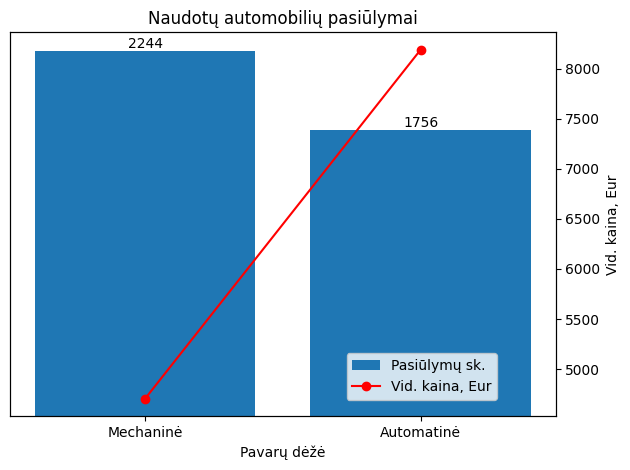

In [14]:
pavaros_kainos = auto_data[['pavaros', 'kainos']].groupby(['pavaros']).mean().reset_index()
pavaros_kiekiai = auto_data['pavaros'].value_counts().reset_index()
pavaros_table = pd.merge(left = pavaros_kiekiai, right = pavaros_kainos, left_on ='pavaros', right_on ='pavaros')

fig, axis = plt.subplots()

grafikas = axis.bar(pavaros_table['pavaros'], pavaros_table['count'], label='Pasiūlymų sk.')
axis.set_title('Naudotų automobilių pasiūlymai')
axis.set_yticks([])
axis.set_xlabel('Pavarų dėžė')
axis.bar_label(grafikas)

# for i in range(len(pavaros_table['pavaros'])):
#         # plt.text(i, pavaros_table['count'][i], pavaros_table['count'][i], ha = 'right')
#         plt.text(i, pavaros_table['count'][i], 'string')
# axis.text(1,50,'string')

ax2 = plt.twinx()
ax2.plot(pavaros_table['pavaros'], pavaros_table['kainos'], color='red', label='Vid. kaina, Eur', marker='o')
ax2.set_ylabel('Vid. kaina, Eur')

fig.legend(loc=[0.55,0.15])
# ax2.legend(loc=[0.71,0.85])
fig.tight_layout()
plt.show()

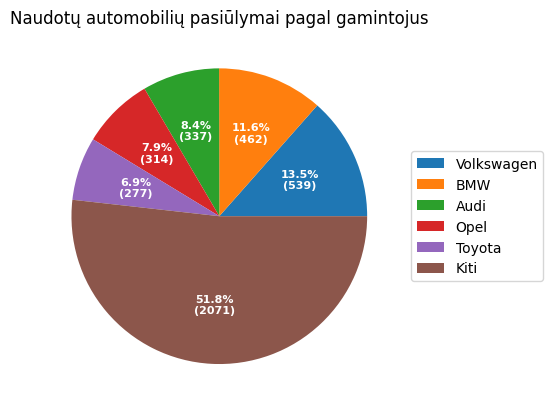

In [19]:
gamintojai_kiekiai = auto_data['gamintojai'].value_counts().sort_values(ascending=False).reset_index().head(5)
total_announcements = len(auto_data)
top5_total_announcements = gamintojai_kiekiai['count'].sum()
other = {'gamintojai': 'Kiti', 'count': total_announcements-top5_total_announcements}
gamintojai_kiekiai = gamintojai_kiekiai._append(other, ignore_index = True)

# fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
fig, axes = plt.subplots()

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = axes.pie(gamintojai_kiekiai['count'], autopct=lambda pct: func(pct, gamintojai_kiekiai['count']),
                                  textprops=dict(color="w"))

axes.legend(wedges, gamintojai_kiekiai['gamintojai'],
        #   title="Gamintojai",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

axes.set_title("Naudotų automobilių pasiūlymai pagal gamintojus")

plt.show()

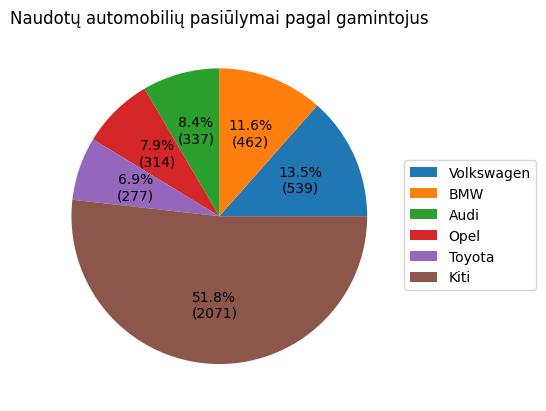

In [35]:
gamintojai_kiekiai = auto_data['gamintojai'].value_counts().sort_values(ascending=False).reset_index().head(5)
total_announcements = len(auto_data)
top5_total_announcements = gamintojai_kiekiai['count'].sum()
other = {'gamintojai': 'Kiti', 'count': total_announcements-top5_total_announcements}
gamintojai_kiekiai = gamintojai_kiekiai._append(other, ignore_index = True)

fig, axes = plt.subplots()

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

axes.pie(gamintojai_kiekiai['count'], autopct=lambda pct: func(pct, gamintojai_kiekiai['count']))
axes.legend(gamintojai_kiekiai['gamintojai'], loc=[1,0.3])
axes.set_title("Naudotų automobilių pasiūlymai pagal gamintojus")

plt.show()